In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np                                  
import pandas as pd 
import tensorflow as tf 
import keras
import matplotlib.pyplot as plt
# pd.set_option("display.max_colwidth", None)

In [3]:
data=pd.read_excel('/content/drive/MyDrive/Input+Data+Synthetic+%28created+but+not+used+in+our+project%29.xlsx')


In [4]:
data.head(5)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [5]:
data.duplicated().sum()

83

In [6]:
data[data.duplicated()]

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com_x00...,bpctwhsn kzqsbmtp,GRP_8
...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24
8051,issue on pricing in distributor_tool,we have agreed price with many of the distribu...,hbmwlprq ilfvyodx,GRP_21
8093,reset passwords for prgthyuulla ramdntythanjes...,the,boirqctx bkijgqry,GRP_17
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
data.sample(5)

,Short description,Description,Caller,Assignment group
982,business_clientæ— æ³•ç™»å…¥,\n\nreceived from: ktghvuwr.uwtakcmj@gmail.com...,ktghvuwr uwtakcmj,GRP_0
3752,"my phone #, erp, ""name or password is incorrec...",i have access to a few systems on erp but i am...,wvaksnpy vnixhytj,GRP_0
3291,job Job_1332 failed in job_scheduler at: 09/26...,received from: monitoring_tool@company.com_x00...,bpctwhsn kzqsbmtp,GRP_9
6908,access to engineering_tool,access to engineering_tool,sjhrytwn yakzbslm,GRP_0
3541,"clad qc computer cannot access the erp, shop_f...",brgtyad ahdwqrson is the operator in this area...,uqrbzknc snvimeqt,GRP_3


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8409 non-null   object
 1   Description        8416 non-null   object
 2   Caller             8417 non-null   object
 3   Assignment group   8417 non-null   object
dtypes: object(4)
memory usage: 328.8+ KB


In [11]:
data.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [12]:
data[data['Description'].isnull()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [13]:
data.Description.replace(np.NaN, 'i am locked out of skype', inplace=True)

In [14]:
data[data['Short description'].isnull()]

,Short description,Description,Caller,Assignment group
2604,NaN,_x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...,ohdrnswl rezuibdt,GRP_34
3383,NaN,_x000D_\n-connected to the user system using t...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn._x000D_\n-connect...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn._x000D_\n-connect...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn._x000D_\n-connect...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn._x000D_\n-connect...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,_x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...,eqmuniov ehxkcbgj,GRP_0


In [15]:
datacallers = data['Caller'].unique() 
datacallers.shape

(2950,)

In [16]:
dfbck=data.copy(deep=True)
data.drop(["Caller","Short description"],axis=1,inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8417 non-null   object
 1   Assignment group  8417 non-null   object
dtypes: object(2)
memory usage: 197.3+ KB


In [17]:
data.isnull().sum()

Description         0
Assignment group    0
dtype: int64

In [18]:
data["Assignment group"].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [19]:
# Target class is imbalanced
cls=data.groupby(['Assignment group']).size().reset_index(name='counts')
cls

,Assignment group,counts
0,GRP_0,3934
1,GRP_1,31
2,GRP_10,140
3,GRP_11,30
4,GRP_12,257
...,...,...
69,GRP_71,2
70,GRP_72,2
71,GRP_73,1
72,GRP_8,645


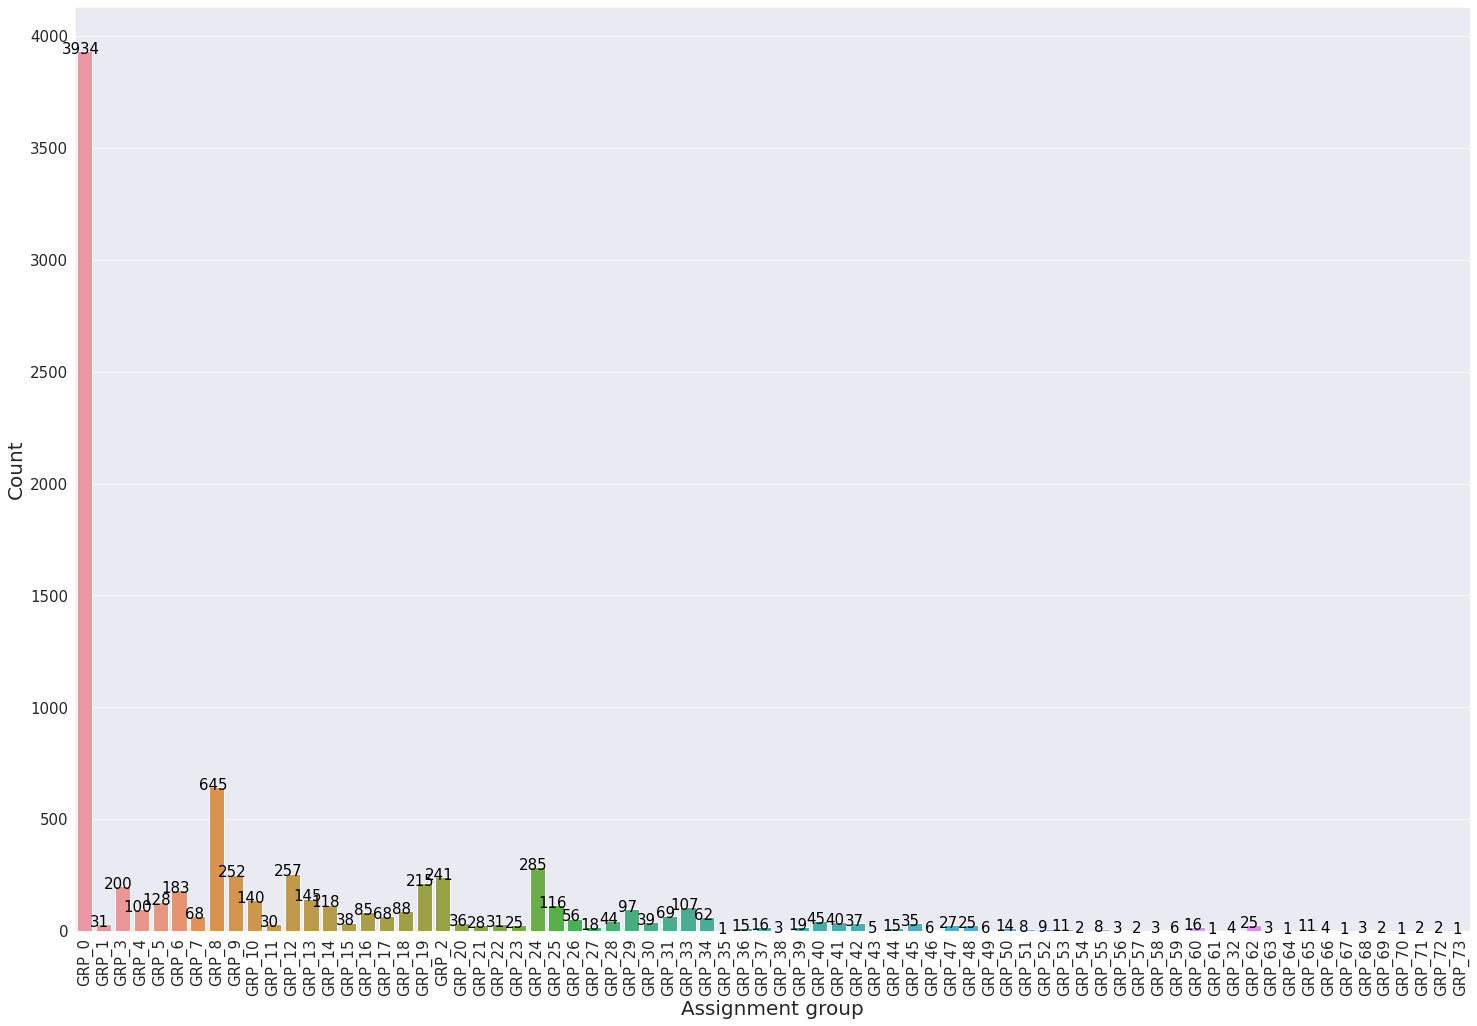

In [20]:
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(25,17))
g=sns.countplot(x='Assignment group', data=data);
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_xlabel("Assignment group",fontsize=20)
g.set_ylabel("Count",fontsize=20)
g.tick_params(labelsize=15)
for p in g.patches:
    g.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+120), ha='center', va='top', color='black', size=15)
plt.show()

In [21]:
targetCnt=data['Assignment group'].value_counts()
targetCnt.describe()

count      74.000000
mean      113.743243
std       460.731077
min         1.000000
25%         5.250000
50%        26.000000
75%        81.000000
max      3934.000000
Name: Assignment group, dtype: float64

In [22]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [23]:
from bs4 import BeautifulSoup
import re
import unicodedata
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords                   
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))

In [24]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text, remove_digits=False):
    #Using regex
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    # Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    return text

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  


In [25]:
def clean_text(text):
    text=text.lower()
    text= re.sub(r"_x000D_",' ',text)
    text = re.sub(r'[\r|\n|\r\n]+', ' ',text)
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    text = re.sub(r"issue resolved.",' ', text)
    # Removing url
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    #Removing email 
    text = re.sub(r'\S+@\S+', '', text)
    text = text.replace("\\", ' ')
    # Removing numbers 
    text = re.sub(r'\d+','' ,text)
    # Removing accented characters
    text = remove_accented_chars(text)
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text= strip_html_tags(text)
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Removing special characters and\or digits    
    special_char_pattern = re.compile(r'([{.(-)!_,}])')
    text = special_char_pattern.sub(" \\1 ", text)
    text = remove_special_characters(text, remove_digits=True) 
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in datacallers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()

    return text

In [26]:
data['Clndescription'] = data['Description'].apply(clean_text)

In [27]:
data.sample(10) 

,Description,Assignment group,Clndescription
5698,please help unlock the accounts of the followi...,GRP_0,please help unlock the accounts of the followi...
6632,_x000D_\n_x000D_\nreceived from: wrelsfqa.qfwo...,GRP_2,xd xd xd good morning xd xd please can you usa...
3550,unable to open outlook,GRP_0,unable to open outlook
7307,å®žä¹ ç”Ÿç™»å½•office365ä¸‹è½½é‚®ä»¶é™„ä»¶æ—¶æ...,GRP_30,aza cycTMaofficea eeaeTMaseTM
7352,dsw ticket in33426117_x000D_\n_x000D_\nevent i...,GRP_2,dsw ticket in xd xd event id xd event summary ...
775,unable to open eps files,GRP_0,unable to open eps files
800,"_x000D_\na termination for svfuhlnx aqrzskpg, ...",GRP_2,xd termination for svfuhlnx aqrzskpg effective...
1675,1.) briefly describe what you were trying ...,GRP_11,briefly describe what you were trying to do an...
5475,sd_sales_order* jobs abended in job_scheduler ...,GRP_5,sd sales order jobs abended in job scheduler d...
2299,"hi khadfhty,\n\ntoday, i created another lean ...",GRP_16,hi khadfhty today created another lean event b...


In [28]:
data=data.loc[(data.Clndescription.str.len() != 0)] 

In [29]:
!pip install langdetect 


     |████████████████████████████████| 981 kB 5.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=d2b2ccfb48b65fe7c14aa0c68f740d8de2bd88bf71d95ca32d4b1e56c4ea609a
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [30]:
!pip install googletrans

     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 1.3 MB 10.6 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 65 kB 3.1 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=7f4c584a1f2804b98b5f8a05e7caed1745b9c989dc59e7eab1631a31b8323448
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [31]:
!pip install deep-translator

     |████████████████████████████████| 128 kB 8.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [32]:
from langdetect import detect
from deep_translator import GoogleTranslator

def detectln(text):
  try:
    result_lang = detect(text)
  except:
    result_lang ='Other'
  return result_lang

#simple function to detect and translate text 
def detect_translate(text,target_lang):
    
    result_lang = detect(text)
    
    if result_lang == target_lang:
        return text 
    
    else:
        translated = GoogleTranslator(source='auto', target=target_lang).translate(text)
        return translated 

In [33]:
data["Language"] = data['Clndescription'].apply(lambda x: detectln(x)) 

In [34]:
data["Language"].unique()

array(['en', 'so', 'no', 'es', 'it', 'af', 'sl', 'sv', 'fr', 'nl', 'ca',
       'tl', 'id', 'fi', 'de', 'cy', 'pt', 'ro', 'pl', 'et', 'da', 'tr',
       'sw', 'hu', 'lv', 'sq', 'cs', 'lt', 'hr', 'sk'], dtype=object)

In [35]:
data[data["Language"] != 'en'].groupby(['Language']).size().reset_index(name='counts')

,Language,counts
0,af,290
1,ca,46
2,cs,3
3,cy,8
4,da,60
5,de,406
6,es,63
7,et,11
8,fi,6
9,fr,122


In [36]:
data=data[data["Language"] != 'Other']

In [37]:
# Autodetecting language & Translating the same using Deep Translator library
data["Trndescription"] = data['Clndescription'].apply(lambda x: detect_translate(x,target_lang='en'))

In [38]:
data[data["Language"] != 'en'].sample(10)

,Description,Assignment group,Clndescription,Language,Trndescription
4844,_x000D_\n_x000D_\nreceived from: bmudkpie.qolr...,GRP_0,xd xd xd xd best,so,xd xd xd xd best
380,unable to login to erp SID_34,GRP_0,unable to login to erp sid,it,unable to login to erp sid
8425,ich weiÃŸ mein erp passwort nicht mehr und hab...,GRP_0,ich weiay mein erp passwort nicht mehr und hab...,de,I don't know my erp password anymore and have ...
6318,display kaum noch lesbar. verbindung bei telef...,GRP_42,display kaum noch lesbar verbindung bei telefo...,de,display barely legible connection with phone c...
8284,received from: monitoring_tool@company.com_x00...,GRP_6,xd abended job in job scheduler snp heu regen at,nl,xd evening job in job scheduler snp hay rain at
1440,setup new ws \batuhan gueduel,GRP_24,setup new ws batuhan gueduel,id,setup new ws batuhan gueduel
1822,erp SID_37 password reset,GRP_0,erp sid password reset,af,erp sid password reset
6630,received from: monitoring_tool@company.com_x00...,GRP_45,xd job job failed in job scheduler at,sl,xd job job failed in job scheduler at
7601,received from: monitoring_tool@company.com_x00...,GRP_8,xd abended job in job scheduler sid hoti at,da,xd abended job in job scheduler sid hoti at
3411,erp SID_34 password reset.,GRP_0,erp sid password reset,af,erp sid password reset


In [39]:
data['length']=[len(text) for text in data['Trndescription']]
data=data[data['length']>=3]
data['Trndescription'] = data['Trndescription'].apply(lambda x : " ".join([word for word in x.split() if(len(word)>2)]))

In [40]:
AsgnGrp=data.groupby(['Assignment group']).size().reset_index(name='counts')
AsgnGrp.set_index(['Assignment group'], inplace = True)
AsgnGrp

,counts
Assignment group,
GRP_0,3928
GRP_1,31
GRP_10,140
GRP_11,30
GRP_12,257
...,...
GRP_71,2
GRP_72,2
GRP_73,1


In [41]:
def assigngrp(grp):
  
  x=AsgnGrp.loc[grp][0]

  if x>10:
    return grp
  else:
    return "GRP_X"

In [42]:
data["ModifiedAssignGrp"]= data['Assignment group'].apply(lambda x: assigngrp(x))

In [43]:
n=data["ModifiedAssignGrp"].nunique()
n

50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


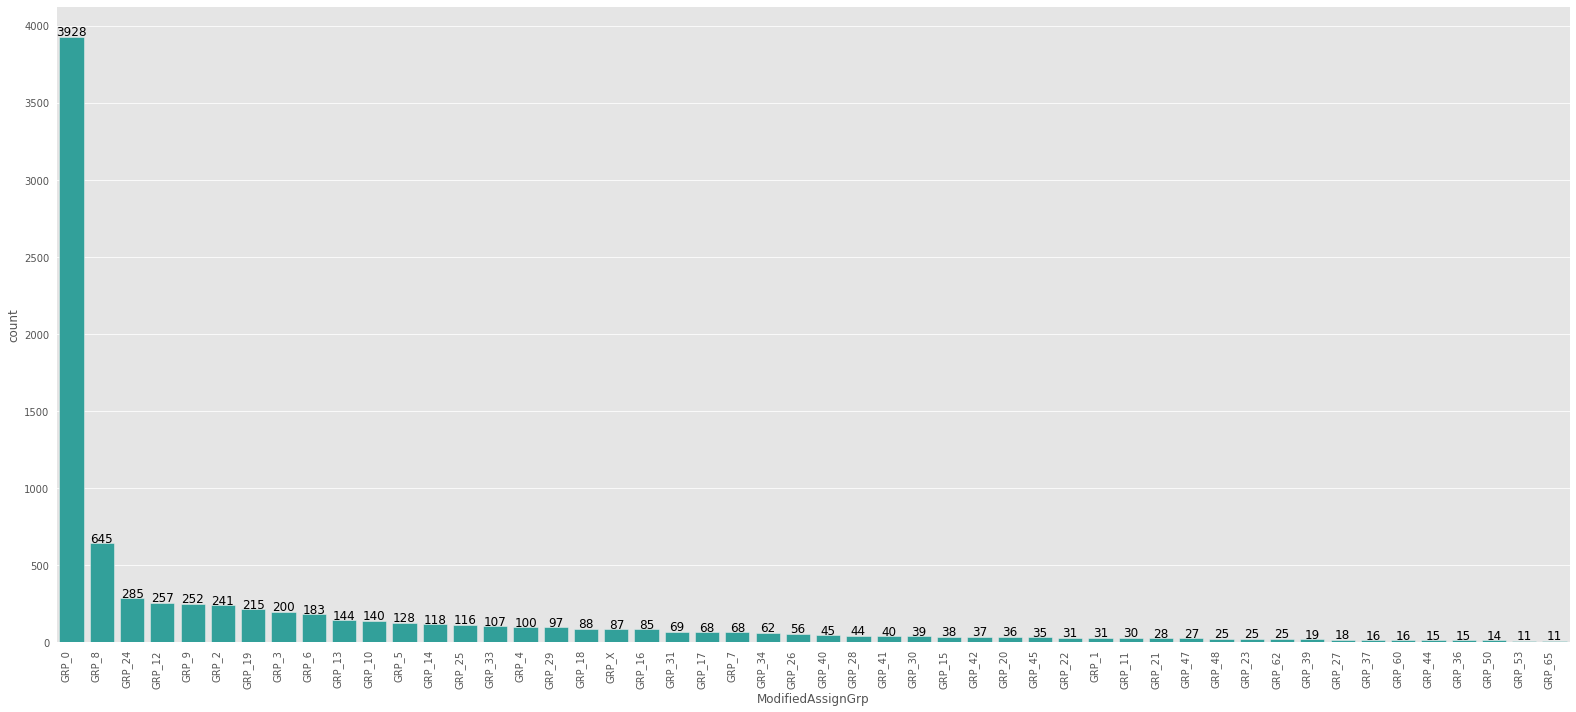

In [44]:
import matplotlib.pyplot as plt
import warnings
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

descending_order = data["ModifiedAssignGrp"].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,10))
ax=sns.countplot(x='ModifiedAssignGrp', data=data, color='lightseagreen',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+170), ha='center', va='top', color='black', size=12)
plt.show()

In [45]:
def lemmatize_corpus(corpus, text_lemmatization=True, stopword_removal=True):
    
    lemmatize_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
            
        lemmatize_corpus.append(doc)
        
    return lemmatize_corpus

In [46]:
data['lmdescription'] = lemmatize_corpus(data['Trndescription'])

In [47]:
data.head(5)

,Description,Assignment group,Clndescription,Language,Trndescription,length,ModifiedAssignGrp,lmdescription
0,-verified user details.(employee# & manager na...,GRP_0,verified user details employee and manager nam...,en,verified user details employee and manager nam...,189,GRP_0,verified user detail employee manager name che...
1,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,xd xd xd hello team xd xd my meetingsskype mee...,en,hello team meetingsskype meetings etc are not ...,154,GRP_0,hello team meetingsskype meeting etc appearing...
2,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,xd xd xd hi xd xd cannot log on to vpn xd xd best,so,cannot log vpn best,49,GRP_0,log vpn best
3,unable to access hr_tool page,GRP_0,unable to access hr tool page,en,unable access tool page,29,GRP_0,unable access tool page
4,skype error,GRP_0,skype error,no,skype error,11,GRP_0,skype error


In [48]:
#Removing descriptions having length more than 3000 characters
data=data.loc[(data.lmdescription.str.len() < 3000)]

Analysing Text


In [49]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from wordcloud import WordCloud

In [50]:
combined_text=data.lmdescription.values.tolist()
combined_text[5]

'unable log engineering tool skype'

In [51]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

data_words = list(sent_to_words(combined_text))

In [52]:
print(data_words[5])

['unable', 'log', 'engineering', 'tool', 'skype']


In [53]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [54]:
print(bigram_mod[data_words[5]])

['unable', 'log', 'engineering', 'tool', 'skype']


In [55]:
print(trigram_mod[bigram_mod[data_words[5]]])

['unable', 'log', 'engineering', 'tool', 'skype']


In [56]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [57]:
data_words_bigrams = make_bigrams(data_words)

In [58]:
print(data_words_bigrams[5])

['unable', 'log', 'engineering', 'tool', 'skype']


In [59]:
wordclouds=' '.join(map(str, data_words_bigrams)) 

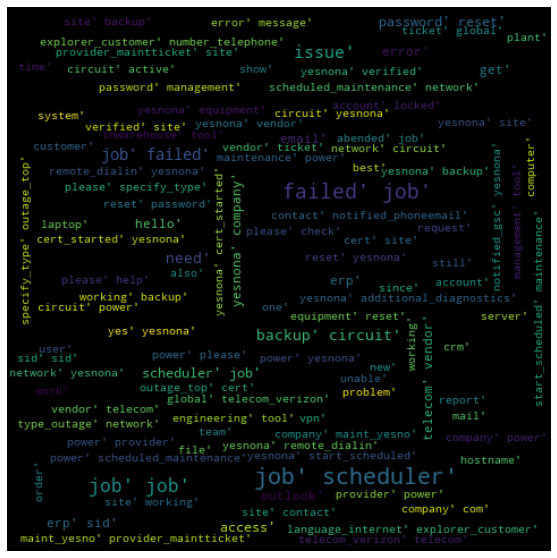

In [60]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordclouds)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

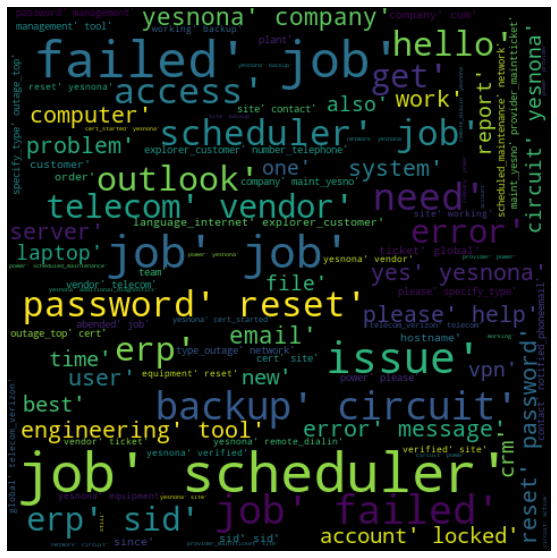

In [61]:
wordcloud_2 = WordCloud(width=480, height=480, max_words=100).generate(wordclouds)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [62]:
id2word = corpora.Dictionary(data_words_bigrams)
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]

In [63]:
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 2), (10, 1), (11, 1), (12, 3), (13, 1)]]


In [64]:
lda_model = LdaModel(corpus=corpus,id2word=id2word,num_topics=7,random_state=200,update_every=1,chunksize=800,passes=10,alpha='auto',per_word_topics=True)

In [65]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.032*"please" + 0.018*"error" + 0.017*"unable" + 0.015*"issue" + '
  '0.015*"hello" + 0.014*"tool" + 0.013*"erp" + 0.012*"outlook" + '
  '0.012*"email" + 0.012*"access"'),
 (1,
  '0.082*"password" + 0.072*"user" + 0.046*"account" + 0.042*"reset" + '
  '0.038*"sid" + 0.033*"erp" + 0.033*"login" + 0.021*"locked" + 0.019*"tool" + '
  '0.017*"please"'),
 (2,
  '0.257*"job" + 0.097*"scheduler" + 0.062*"failed" + 0.043*"abended" + '
  '0.022*"sid" + 0.021*"ticket" + 0.021*"hostname" + 0.016*"language_internet" '
  '+ 0.016*"number_telephone" + 0.016*"explorer_customer"'),
 (3,
  '0.033*"event" + 0.016*"ticket" + 0.013*"company" + 0.013*"com" + '
  '0.011*"let_know" + 0.009*"name" + 0.008*"connection" + 0.008*"tcp" + '
  '0.008*"hostname" + 0.006*"host"'),
 (4,
  '0.127*"yesnona" + 0.060*"site" + 0.050*"power" + 0.047*"circuit" + '
  '0.044*"vendor" + 0.038*"backup" + 0.027*"network" + 0.027*"company" + '
  '0.025*"telecom" + 0.024*"yes"'),
 (5,
  '0.023*"device" + 0.017*"server" + 0

In [66]:
texts=data_words_bigrams
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.088837863296459

Coherence Score:  0.5714141553957492


In [67]:
# adding a deep copy to another dataframe df to other Dataframe
data =  data.copy()
data['num_words'] = data.Description.apply(lambda x : len(x.split()))
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,8395.0,138.967242,223.880972,3.0,35.0,62.0,155.0,3874.0
num_words,8395.0,26.902799,44.646987,1.0,6.0,12.0,30.0,1057.0


In [68]:
bins=[0,50,75, np.inf]
data['bins']=pd.cut(data.num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])
word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [69]:
word_distribution

,bins,counts
0,0-100,7990
1,100-300,378
2,300-500,17
3,500-800,8
4,>800,2


Text(0.5, 1.0, 'Word distribution per bin')

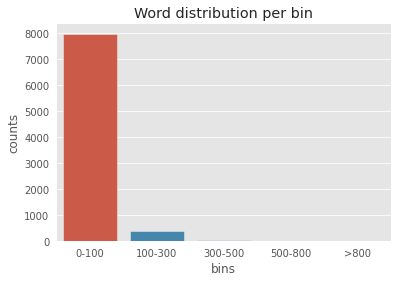

In [70]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# split X and y into training and testing sets
trainX, testX, trainY, testY = train_test_split(data['lmdescription'], data['ModifiedAssignGrp'], random_state=100)

In [73]:
#Traing data
print(trainX.shape)
print(trainY.shape)

(6296,)
(6296,)


In [74]:
#Test Data
print(testX.shape)
print(testY.shape)

(2099,)
(2099,)


In [75]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(max_df=0.7,analyzer='word')

In [76]:
# transforming the training data to document_term_matrix
vectorizer.fit(trainX)
trainX_tf=vectorizer.transform(trainX)

In [77]:
#Converting Test descriptions also to tf-idf vectors
testX_tf = vectorizer.transform(testX)

In [78]:
trainX_tf.shape

(6296, 8776)

In [79]:
testX_tf.shape

(2099, 8776)

In [80]:
len(vectorizer.vocabulary_)

8776

In [81]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

Support Vector Machine Classifier


In [82]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1, 10], } 

In [83]:
svc = SVC()
svc_gs = GridSearchCV(svc,param_grid,cv=2)
svc_gs.fit(trainX_tf, trainY)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]})

In [84]:
svc_gs.best_params_

{'C': 10, 'gamma': 0.1}

In [85]:
svc_tf = SVC(C=10, gamma=0.1)
svc_tf.fit(trainX_tf, trainY)
pred_testY_tf = svc_tf.predict(testX_tf)
#Calculate accuracy on Test Dataset
metrics.accuracy_score(testY, pred_testY_tf)

0.6526917579799905

In [86]:
resultsml=pd.DataFrame()
tempResults = pd.DataFrame({'Model':['SVM Classifier Dataset1'], 'Pred_Accuracy': [metrics.accuracy_score(testY, pred_testY_tf)],'Pred_Unsampled_Accuracy': 'NA'},index={'1'})
resultsml = pd.concat([resultsml, tempResults])

Random Forest Classifier

In [87]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}

In [88]:
rfc=RandomForestClassifier()
rfc_gs = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2)
rfc_gs.fit(trainX_tf, trainY)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [89]:
rfc_gs.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}

In [90]:
rfc_tf=RandomForestClassifier(max_features='sqrt', n_estimators= 200, criterion='gini')
rfc_tf.fit(trainX_tf, trainY)
predY_rf=rfc_tf.predict(testX_tf)
print("Accuracy:",metrics.accuracy_score(testY, predY_rf))

Accuracy: 0.6279180562172463


In [91]:
tempResults = pd.DataFrame({'Model':['Random Forest Classifier Dataset1'], 'Pred_Accuracy': [metrics.accuracy_score(testY, predY_rf)],'Pred_Unsampled_Accuracy': 'NA'},index={'2'})
resultsml = pd.concat([resultsml, tempResults])

Neural Network Model

In [92]:
import tensorflow as tf
import numpy as np

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
letrainY = le.fit_transform(trainY.values)
letestY = le.transform(testY.values)

In [94]:
#Start building a Keras Sequential Model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [95]:
#Add hidden layers
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(len(vectorizer.vocabulary_),)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
#Add Output layer
model.add(tf.keras.layers.Dense(n, activation='softmax'))

In [96]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [97]:
model.fit(trainX_tf, letrainY, epochs=10, batch_size=32, validation_data=(testX_tf, letestY))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


197/197 [==============================] - 4s 16ms/step - loss: 2.4986 - acc: 0.4976 - val_loss: 1.9950 - val_acc: 0.5312
Epoch 2/10
197/197 [==============================] - 3s 15ms/step - loss: 1.8484 - acc: 0.5583 - val_loss: 1.8166 - val_acc: 0.5669
Epoch 3/10
197/197 [==============================] - 3s 15ms/step - loss: 1.5686 - acc: 0.6020 - val_loss: 1.6970 - val_acc: 0.5955
Epoch 4/10
197/197 [==============================] - 3s 15ms/step - loss: 1.3250 - acc: 0.6526 - val_loss: 1.6194 - val_acc: 0.6051
Epoch 5/10
197/197 [==============================] - 3s 15ms/step - loss: 1.1223 - acc: 0.6970 - val_loss: 1.6138 - val_acc: 0.6351
Epoch 6/10
197/197 [==============================] - 3s 15ms/step - loss: 0.9476 - acc: 0.7468 - val_loss: 1.5709 - val_acc: 0.6327
Epoch 7/10
197/197 [==============================] - 3s 15ms/step - loss: 0.8006 - acc: 0.7789 - val_loss: 1.6282 - val_acc: 0.6389
Epoch 8/10
197/197 [==============================] - 3s 15ms/step - loss: 0.698

In [98]:
score = model.evaluate(testX_tf, letestY, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

66/66 [==============================] - 0s 2ms/step - loss: 1.8243 - acc: 0.6384
Test Score: 1.824347734451294
Test Accuracy: 0.6383992433547974
